In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# Create the experimental and control groups:

# experimental: 20 got better, 30 did not
experimental = np.concatenate([np.zeros(30), np.ones(20)])

# control: 5 got better, 45 did not
control = np.concatenate([np.zeros(45), np.ones(5)])

print 'experimental mean rate:', np.mean(experimental)
print 'control mean rate:', np.mean(control)
print 'difference in mean rates:', np.mean(experimental) - np.mean(control)

# H0: true difference in mean rates == 0
# H1: difference is not 0
# P(measured difference in rates|H0 is true)

experimental mean rate: 0.4
control mean rate: 0.1
difference in mean rates: 0.3


In [20]:
experimental_var = np.var(experimental)
control_var = np.var(control)

print experimental_var, control_var

denominator = np.sqrt((experimental_var)/len(experimental) + (control_var)/len(control))
#denominator = np.sqrt((experimental_var)/4 + (control_var)/4)

t_stat = (np.mean(experimental) - np.mean(control)) / denominator

print denominator
print t_stat


0.24 0.09
0.0812403840464
3.69274472938


In [13]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# stats.t.pdf() takes x-axis points, degrees of freedom, mean of distribution, 
# std dev. of distribution
ypoints = stats.t.pdf(xpoints, 50, 0, 1)

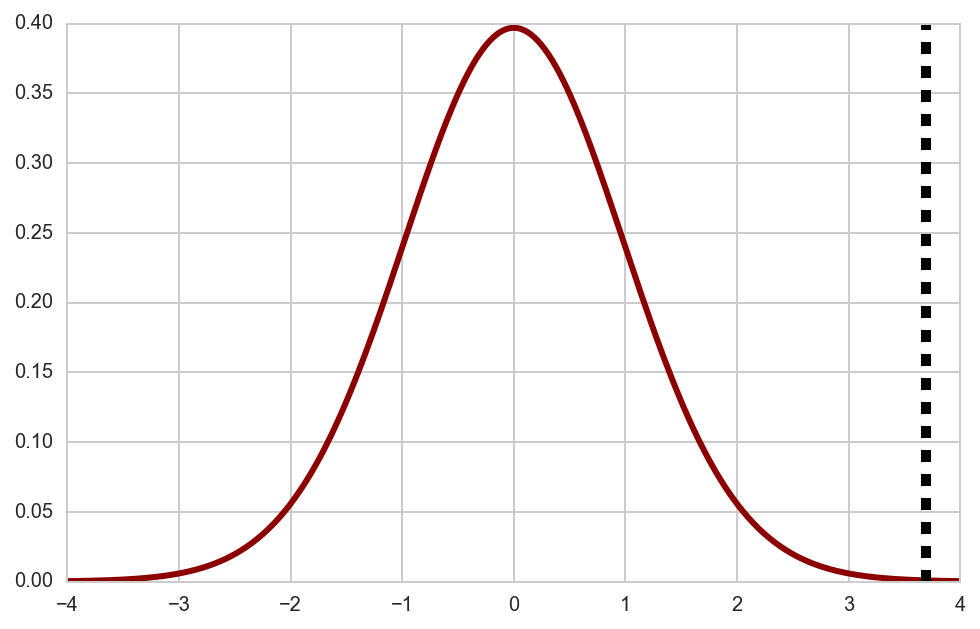

In [21]:
# initializes the axis: 
# figsize = (width, height) in "inches"
fig = plt.figure(figsize=(8,5))

# gca means "get current axis"
ax = fig.gca()

# matplotlib "plot" function. plots lines defined by x and y points
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line where our t-stat is on the distribution:
ax.axvline(t_stat, color='black', linestyle='dashed', linewidth=5)

In [22]:
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=3.6556307750696551, pvalue=0.00041473769762161242)